# Definition du programme

### Importation des modules nécessaires

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.,12.)

### Definition des classes

In [1]:
# TODO: transformer en classe avec 
# 1) initialisation des hypohthèses
# 2) calculs de l'équivalent subvention
# 3) représentation graphique des résultats


def eq_subvention(montant, duree, taux):
    """ Calcule l' "équivalent subvention" par rapport à un taux 0%
    pour chacune des différentes combinaisons d'hypothèses possibles"""
    # RAZ des résultats
    equivalent_subvention=np.zeros((len(montant),len(duree),len(taux)))
    part_subventionee=np.zeros((len(montant),len(duree),len(taux)))
    # Calcule de l' "équivalent subvention"
    for i in range(len(montant)):
        for j in range(len(duree)):
            # Périodicité des remboursements 
            per=np.arange(duree[j])+1
            for k in range(len(taux)):
                # Calcule l'échancier des intérêts perçus
                echeancier_interets=-np.ipmt(taux[k], per, duree[j], montant[i])
                # Calcule et enregistre l' "équivalent subvention" comparé
                # à un taux 0 pour le jeu d'hypothèses considéré, les flux
                # d'intérêt étant actualisés à 4%
                equivalent_subvention[i,j,k]=np.npv(0.04, echeancier_interets)
                # ou alternativement, sans actualiser:  
                # equivalent_subvention[i,j,k]=np.sum(echeancier_interets)
                part_subventionee[i,j,k]=(equivalent_subvention[i,j,k]\
                        /montant[i])*100
    return equivalent_subvention, part_subventionee


# Lancement de la simulation

### Initilisation des hypothèses

In [3]:
taux=np.linspace(0.,0.1,11)
duree=[3, 5, 7, 10, 12]
montant=[5000, 10000, 15000, 20000]

### Calcul des résultats

In [4]:
equivalent_subvention, part_subventionee=eq_subvention(montant, duree, taux)

D:\Anaconda3\lib\site-packages\numpy\lib\financial.py:215: RuntimeWarning: invalid value encountered in true_divide
  (1 + rate*when)*(temp - 1)/rate + zer)
D:\Anaconda3\lib\site-packages\numpy\lib\financial.py:123: RuntimeWarning: invalid value encountered in true_divide
  (1 + rate*when)*(temp - 1)/rate + zer)


# Résultations de la simulation

### Visualisation graphique des résultats

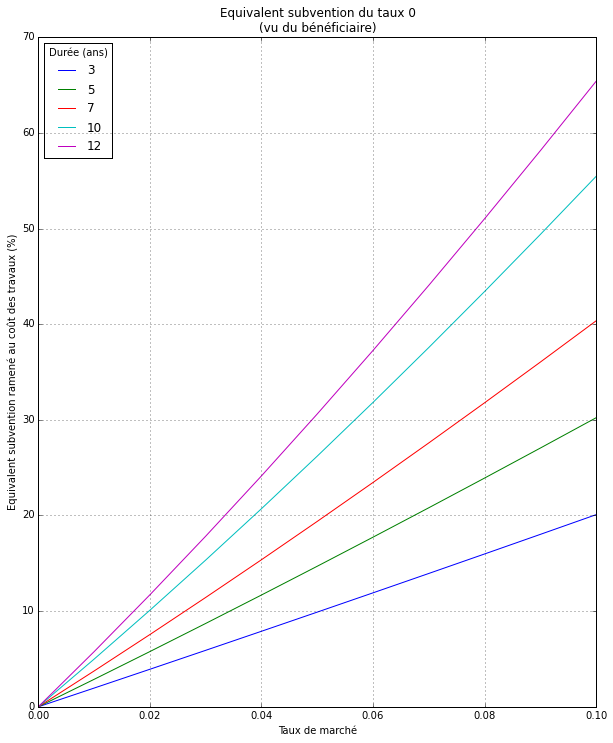

In [5]:
# Visualisation des résultats
plt.figure('Equivalent subvention du taux 0')
plt.title('Equivalent subvention du taux 0\n(vu du bénéficiaire)')
plt.grid(color="k")
plt.xlabel('Taux de marché')
plt.xlim(0,0.1)
plt.ylabel('Equivalent subvention ramené au coût des travaux (%)')
for j in range(len(duree)):
    plt.plot(taux, part_subventionee[0,j])
plt.legend(duree, title='Durée (ans)', loc='upper left')